In [1]:
%load_ext autoreload
%autoreload 2

In [73]:
from dynadojo.systems.lorenz import LorenzSystem
from dynadojo.wrappers import SystemChecker, AlgorithmChecker
from dynadojo.baselines.dnn import DNN #, Transformer, CNN
from dynadojo.utils.lds import plot

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

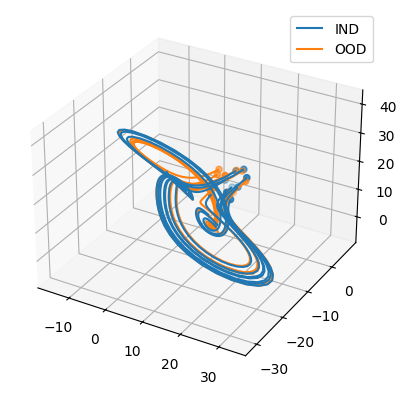

In [74]:
latent_dim = 3
embed_dim = latent_dim
n = 50
test_size = 10
timesteps = 100
system = SystemChecker(LorenzSystem(latent_dim, embed_dim, noise_scale=0, seed=1912,
                                    sigma=10, r=28, a_squared=1/2.0, b=8.0/3.0, 
                                    t_range=(0, 1),
                                    ))
# system = SystemChecker(LDSystem(latent_dim, embed_dim, noise_scale=0, seed=1912))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(test_size, in_dist=True)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=False)
plot([x, y], target_dim=min(latent_dim, 3), labels=["IND", "OOD"], max_lines=test_size)

In [81]:
model1 = AlgorithmChecker(
    DNN(embed_dim, timesteps, max_control_cost=0, seed=109, 
    )
)

# model2 = AlgorithmChecker(
#     Transformer(embed_dim, timesteps, max_control_cost=0, seed=109, 
#                        model_dim=3, num_heads=3, num_layers=2, dropout=0.1, activation="relu",
#     )
# )

# model3 = AlgorithmChecker(
#     CNN(embed_dim, timesteps, max_control_cost=0, seed=109
#     )
# )





Using device: mps


In [83]:
model1.fit(x, 
        epochs=5000,
        batch_size=50,
        learning_rate=1e-1 ,
        validation_split=0.1,
        patience=15,
        min_delta=0,
        min_epochs=1000,
        verbose=1)


Training on 0.9 of the data, validating on the rest
Early stopping from epoch 1000 with patience 15 and min_delta 0
Dataloader length: 1
Epoch [10/5000], Loss: 0.8839, Val Loss: 0.9107, , took 0.07s
Epoch [20/5000], Loss: 0.0472, Val Loss: 0.1385, , took 0.06s
Epoch [30/5000], Loss: 0.1177, Val Loss: 0.0564, , took 0.05s
Epoch [40/5000], Loss: 0.0707, Val Loss: 0.0669, , took 0.06s
Epoch [50/5000], Loss: 0.0360, Val Loss: 0.0425, , took 0.05s
Epoch [60/5000], Loss: 0.0293, Val Loss: 0.0324, , took 0.05s
Epoch [70/5000], Loss: 0.0281, Val Loss: 0.0292, , took 0.05s
Epoch [80/5000], Loss: 0.0277, Val Loss: 0.0279, , took 0.05s
Epoch [90/5000], Loss: 0.0273, Val Loss: 0.0272, , took 0.13s
Epoch [100/5000], Loss: 0.0269, Val Loss: 0.0269, , took 0.13s
Epoch [110/5000], Loss: 0.0267, Val Loss: 0.0267, , took 0.08s
Epoch [120/5000], Loss: 0.0266, Val Loss: 0.0266, , took 0.07s
Epoch [130/5000], Loss: 0.0265, Val Loss: 0.0265, , took 0.06s
Epoch [140/5000], Loss: 0.0264, Val Loss: 0.0264, , t

x_err=9.61661714216364


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

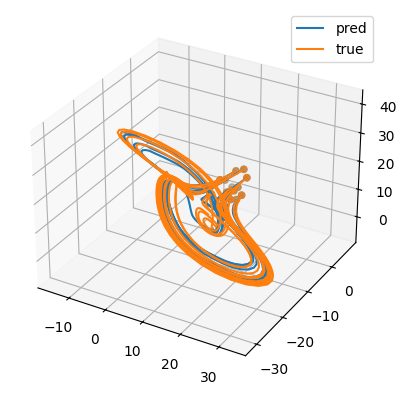

In [85]:
# Visualize train loss
x_pred = model1.predict(x0, timesteps)
x_err = system.calc_error(x, x_pred)
print(f"{x_err=}")
plot([x_pred, x], target_dim=min(3, latent_dim), labels=["pred", "true"], max_lines=15)

y_err=7.661355734410314


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

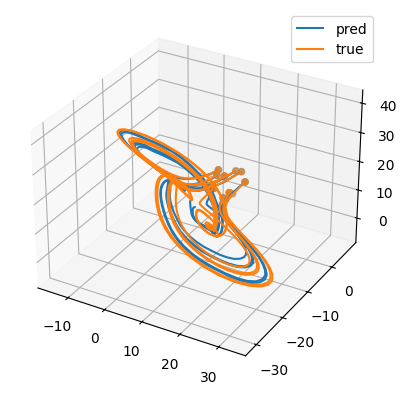

In [86]:
# Visualize test loss
y_pred = model1.predict(y0, timesteps)
y_err = system.calc_error(y, y_pred)
y - y_pred
print(f"{y_err=}")
plot([y_pred, y], target_dim=min(3, latent_dim), labels=["pred", "true"], max_lines=15)